Sodelujoči

    Tomaž Štrus
    Anže Košir
    Jan Harej

O projektu: Iz platforme Steam, namenjenu predvsem za distrubicijo video iger, bomo zbrali podatke igrah več ljudi, ter analizirali stvari kot so npr. koliko iger, ki jih kupijo dejansko preigrajo, kolika časa bo nekdo zapravil za neko igro, kakšno igro bo kupil naslednjo, glede na svoje igre ipd.

Podatki: Uporabili bomo API, ki ga ponuja Steam: https://developer.valvesoftware.com/wiki/Steam_Web_API#JSON Tu lahko dobimo podatko o čisto vsemu kar potrebujemo npr. o uporabniku, njegove igre, prijatelji, koliko ur je igral neko igro, ... Dobili bomo podatke za npr. 100.000+ uporabnikov (prijatelji naših prijateljev, in njihov prijateljev itd.)

## Vprašanja za raziskavo
1. Povprečno dokončanje igre
2. Število in vrsta Bannov v povezavi z javnimi/privatnimi profili
3. Najmanjkrat odklenjeni dosežki za igrane igre
4. Število prijateljev glede na "starost" računa

In [1]:
from steam_imports import *

In [2]:
from data_variables import *

In [3]:
from get_functions import *

In [4]:
from fill_functions import *

In [5]:
from get_read_write import *

# Odgovori na vprašanja

### 1. Povprečno dokončanje igre

### 2. Število in vrsta Bannov v povezavi z javnimi/privatnimi profili

### 3. Najmanjkrat odklenjeni dosežki za igrane igre

### 4. Število prijateljev glede na "starost" računa

Text(0.5,0,'starost računa (leta)')

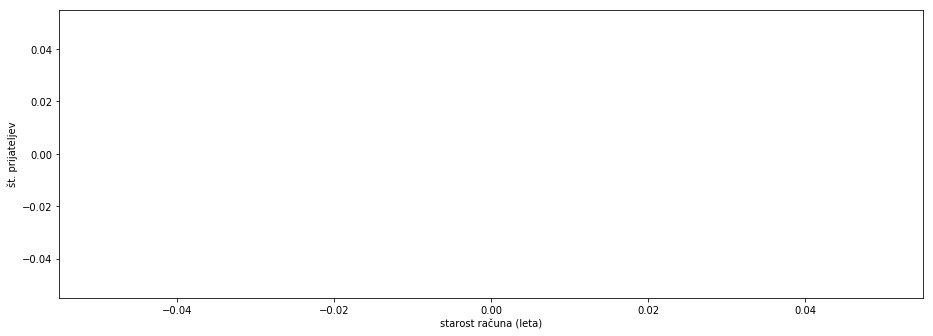

In [6]:
graph = dict()
today = datetime.datetime.now()

for player_id in global_player_ids:
    try:
        time_created = datetime.datetime.fromtimestamp(int(players_summaries[player_id]["timecreated"]))
    except KeyError:
        continue
    
    years = today.year - time_created.year
    if today.month < time_created.month or (today.month == time_created.month and today.day < time_created.day):
        years -= 1
        
    try:
        last_log = players_summaries[player_id]["lastlogoff"]
    except KeyError:
        continue
    try:
        time_last_log = datetime.datetime.fromtimestamp(int(last_log))
    except KeyError:
        continue
    #if today.month - time_last_log.month <=3 and today.year - time_last_log.year <= 1:     
    if years not in graph:
        graph[years] = [len(player_friends[player_id]), 1]
    else :
        su, cnt = graph[years]
        graph[years] = [su +len(player_friends[player_id]), cnt+1]

graph_x = []
graph_y = []
        
for dat in sorted(graph.items()):
    graph_x += [dat[0]]
    graph_y += [dat[1][0]/dat[1][1]]
    
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 2, 1])
axes.bar(graph_x, graph_y)
axes.set_ylabel('št. prijateljev')
axes.set_xlabel('starost računa (leta)')
#axes.set_title('Primerjava žanrov ter njihovih ocen');

## 5. Odvisnost med težavnostjo igre in njenim uspehom